In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Problem 1

In [2]:
#1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [3]:
# What is the probability that no cars drive up in the noon hour?

In [4]:
# Theoretical Answer
stats.poisson(2).pmf(0)

0.1353352832366127

In [5]:
# Experimental Answer
(np.random.poisson(2, 100000) == 0).mean()

0.13495

In [6]:
# What is the probability that 3 or more cars come through the drive through?

In [7]:
# Theoretical Answer
stats.poisson(2).sf(2)

0.32332358381693654

In [8]:
# Experimental Answer
(np.random.poisson(2, 100000) >= 3).mean()

0.32328

In [9]:
# How likely is it that the drive through gets at least 1 car?

In [10]:
# Theoretical Answer
stats.poisson(2).sf(0)

0.8646647167633873

In [11]:
# Experimental Answer
(np.random.poisson(2, 100000) >= 1).mean()

0.86395

Text(0.5, 1.0, 'Poisson distribution mean / time period of 2 events')

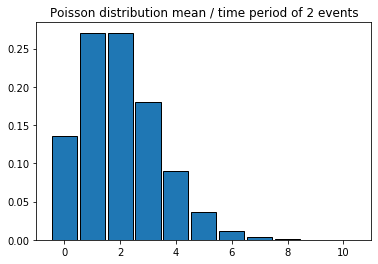

In [12]:
x = np.arange(0, 11)
y = stats.poisson(2).pmf(x)

plt.bar(x, y, width=.9, ec='black')
plt.title('Poisson distribution mean / time period of 2 events')

# Problem 2

In [13]:
#2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [14]:
# What grade point average is required to be in the top 5% of the graduating class?

In [15]:
# Theoretical Answer
stats.norm(3, .3).isf(.05)

3.4934560880854417

In [16]:
# Experimental Answer
np.quantile(np.random.normal(3, .3, 10000), .95)

3.4914302128405996

In [17]:
# What GPA constitutes the bottom 15% of the class?

In [18]:
# Theoretical Answer
stats.norm(3, .3).ppf(.15)

2.689069983151863

In [19]:
# Experimental Answer
np.quantile(np.random.normal(3, .3, 10000), .15)

2.6922106475385643

In [20]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [21]:
# Theoretical Answer
stats.norm(3, .3).ppf([.2, .3,])

array([2.74751363, 2.84267985])

In [22]:
# Experimental Answer
np.quantile(np.random.normal(3, .3, 10000), [.2, .3])

array([2.74589808, 2.83996721])

In [23]:
# If I have a GPA of 3.5, what percentile am I in?

In [24]:
# Theoretical Answer
stats.norm(3, .3).cdf(3.5)

0.9522096477271853

In [25]:
# Experimental Answer
1 - (np.random.normal(3, .3, 10000) >= 3.5).mean()

0.9483

# Problem 3

In [26]:
#3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [27]:
# Theoretical Answer
p = .02
n = 4326
stats.binom(n, p).sf(96)

0.1397582363130086

In [28]:
# Experimental Answer
(np.random.choice([1, 0], p=[.02, .98], size=(10000, 4326)).sum(axis=1) >= 97).mean()

0.1436

# Problem 4

In [29]:
#4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [30]:
# What is the probability that at least one of your first 60 answers is correct?

In [31]:
# Theoretical Answer
p = .01
n = 60
stats.binom(n, p).sf(0)

0.4528433576092388

In [32]:
# Experimental Answer
(np.random.binomial(60, .01, 100000) > 0).mean()

0.45183

# Problem 5

In [33]:
#5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [34]:
# Each day?

In [35]:
# Theoretical Answer
p = .03
n = round(.9 * 3 * 22)
stats.binom(n, p).sf(0)

0.8342199288437355

In [36]:
# Experimental Answer
(np.random.choice([1, 0], p=[.03, .97], size=(1000, n)).sum(axis=1) > 0).mean()

0.832

In [37]:
# Two day without getting cleaned up?

In [38]:
# Theoretical Answer
stats.binom(n * 2, p).pmf(0)

0.02748303199257623

In [39]:
# Experimental Answer
(np.random.choice([1, 0], p=[.03, .97], size=(1000, n * 2)).sum(axis=1) == 0).mean()

0.035

In [40]:
# All week?

In [41]:
# Theoretical Answer
p = .03
n = round(.9 * 3 * 22)
1 - stats.binom(n * 5, p).sf(0)

0.00012521651388086585

In [42]:
# Experimental Answer
(np.random.choice([1, 0], p=[.03, .97], size=(10000, n * 5)).sum(axis=1) == 0).mean()

0.0003

# Problem 6

In [43]:
#6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [44]:
# Theoretical Answer
mean = 15 * 2 # people times minutes to order
sd = 3 * 2 # people times minutes to order

time_for_lunch = 60
time_to_get_food = 10
time_to_eat = 15

# maximum amount of time waiting in line
wait_time_cap = time_for_lunch - (time_to_get_food + time_to_eat)

stats.norm(mean, sd).cdf(wait_time_cap)

0.7976716190363569

In [45]:
# Experimental Answer
(np.random.normal(mean, sd, 10000) <= wait_time_cap).mean()

0.79

# Problem 7

In [46]:
#7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [ ]:
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE emp_no IN (
    SELECT emp_no FROM dept_emp
    WHERE to_date > NOW()
) AND to_date > NOW()
'''
    
salaries = pd.read_sql(query, url)

In [3]:
#a. What percent of employees earn less than 60,000?

In [4]:
# Theoretical Answer
stats.norm(mean, sd).cdf(60000)

NameError: name 'mean' is not defined

In [5]:
# Experimental Answer
(salaries.salary < 60000).mean()

NameError: name 'salaries' is not defined

In [6]:
#b. What percent of employees earn more than 95,000?

In [7]:
# Theoretical Answer
stats.norm(mean, sd).sf(95000)

NameError: name 'mean' is not defined

In [8]:
# Experimental Answer
(salaries.salary > 95000).mean()

NameError: name 'salaries' is not defined

In [9]:
#c. What percent of employees earn between 65,000 and 80,000?

In [10]:
# Theoretical Answer
np.diff(stats.norm(mean, sd).cdf([65000, 80000]))

NameError: name 'mean' is not defined

In [11]:
# Experimental Answer
((salaries.salary >= 65000) & (salaries.salary <= 80000)).mean()

NameError: name 'salaries' is not defined

In [12]:
#d. What do the top 5% of employees make?

In [13]:
# Theoretical Answer
stats.norm(mean, sd).isf(.05)

NameError: name 'mean' is not defined

In [14]:
# Experimental Answer
salaries.salary.quantile(.95)

NameError: name 'salaries' is not defined